# Importing the required Libraries

In [ ]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Flatten
from keras.models import Model

In [ ]:
from keras.datasets import mnist

In [ ]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adagrad

# Load the Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


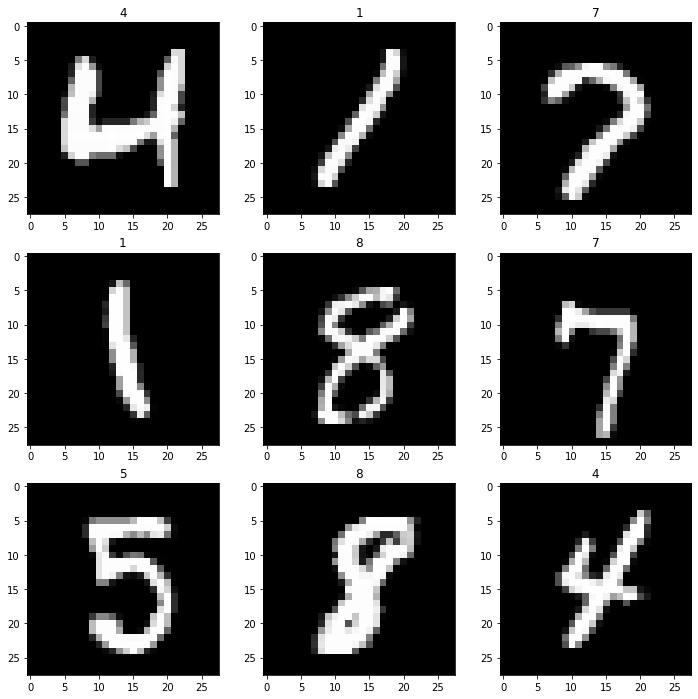

In [ ]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

# Data Preprocessing

In [ ]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

# Adding the channel
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# # here we are having a class number for each image
# print("Class label of first image :", y_train[0])

# # lets convert this into a 10 dimensional vector
# # ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# # this conversion needed for MLPs 

# Y_train = np_utils.to_categorical(y_train, 10) 
# Y_test = np_utils.to_categorical(y_test, 10)

# print("After converting the output into a vector : ",Y_train[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_ground, valid_ground = train_test_split(X_train,
                                                                X_train, 
                                                                test_size=0.2, 
                                                                random_state=13)

# Building the model - Experiment_SGD(without momentum)

In [ ]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = SGD())

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

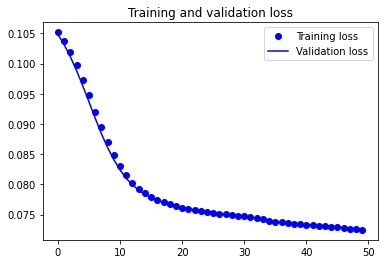

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test Images


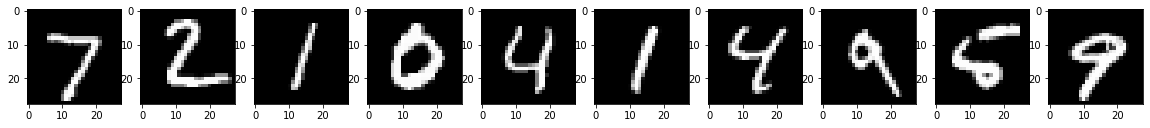

Compressed Image


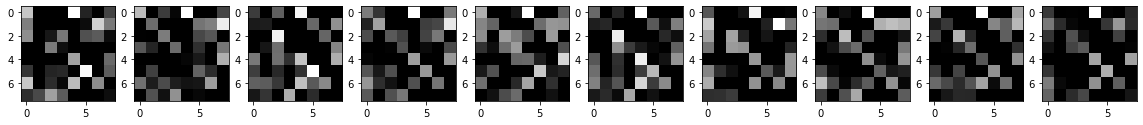

Reconstruction of Test Images


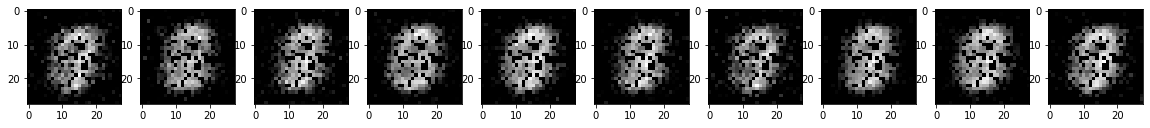

In [ ]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')  
plt.show()

# Building the model - Experiment_SGD(with momentum)

In [ ]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = SGD(momentum=0.9))

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

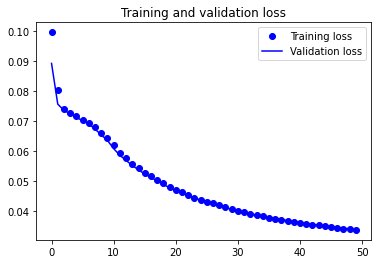

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test Images


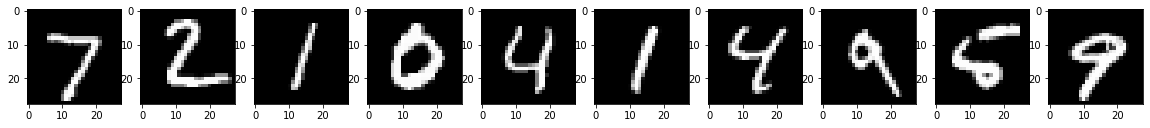

Compressed Image


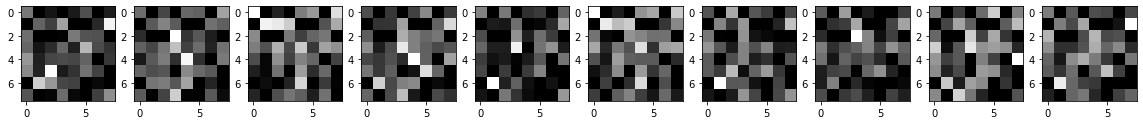

Reconstruction of Test Images


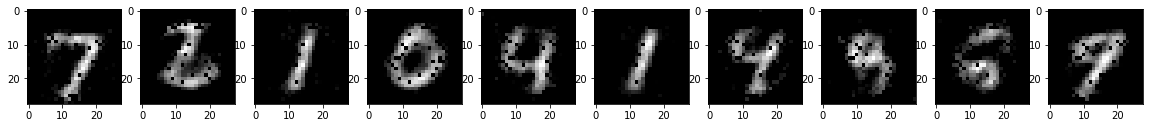

In [ ]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')  
plt.show()

# Building the model - Experiment_RMSProp

In [ ]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

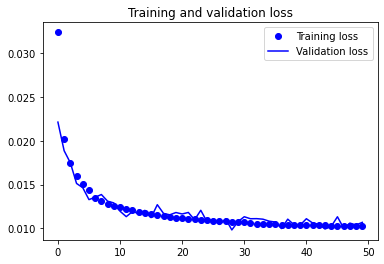

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test Images


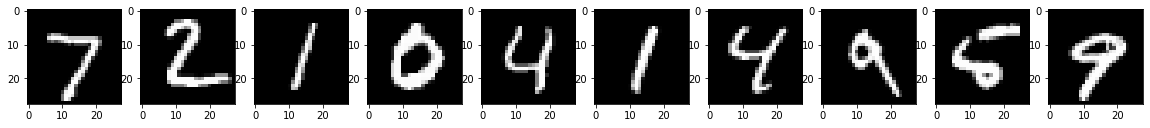

Compressed Image


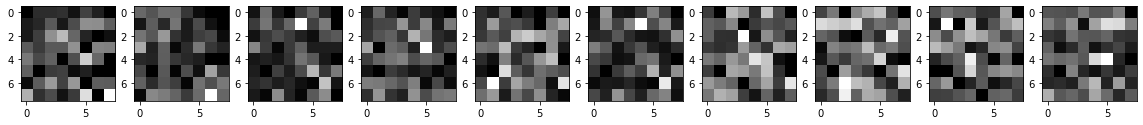

Reconstruction of Test Images


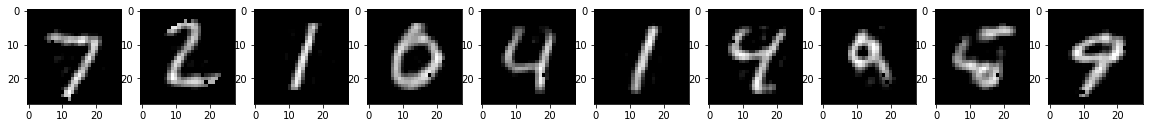

In [ ]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')  
plt.show()

# Building the model - Experiment_ADAM

In [ ]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

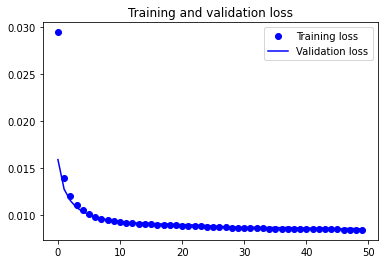

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test Images


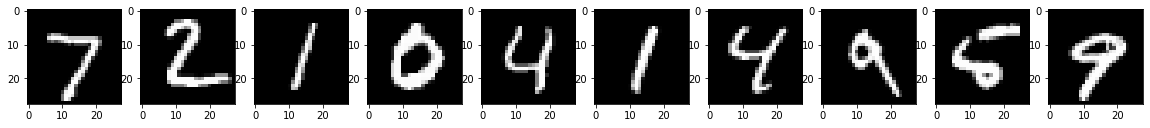

Compressed Image


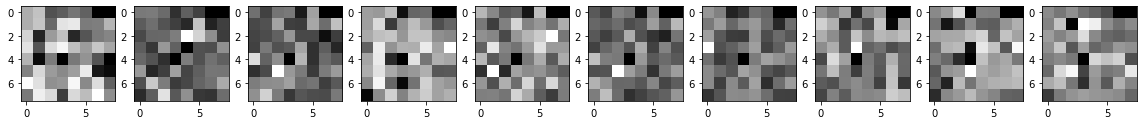

Reconstruction of Test Images


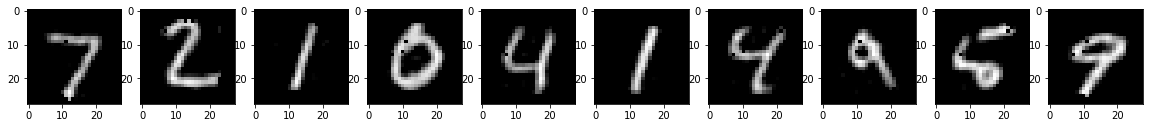

In [ ]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show() 

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')  
plt.show()